In [9]:
# Ensemble 

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statistics import mode
from sklearn import preprocessing, model_selection as cross_validation, neighbors, svm

In [16]:
#using breast cancer 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [17]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [18]:
from sklearn.ensemble import VotingClassifier

model2 = LogisticRegression(random_state=1)
#model2 = DecisionTreeClassifier(random_state=1)
model1 = svm.SVC()

In [19]:
model1.fit(x_train,y_train)
print(' model 1 accuracy:',model1.score(x_test,y_test))

 model 1 accuracy: 0.6293706293706294


In [20]:
model2.fit(x_train,y_train)
print(' model 2 accuracy:',model2.score(x_test,y_test))


 model 2 accuracy: 0.958041958041958


In [21]:
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard') # lr : logistic regression
                                                                                     # dt : decision tree 
model.fit(x_train,y_train)
print('Ensemble model accuracy:',model.score(x_test,y_test))

Ensemble model accuracy: 0.958041958041958


In [23]:
# voting_from_scratch 

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from statistics import mode


cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)
#Max viting
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))
print('Max Voting')
print(final_pred)
#Average Voring
finalpred=(pred1+pred2+pred3)/3
print('Average Voting')
print(final_pred)

#Weighted Average Voring
finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)
print('Weighted Average Voting')
print(final_pred)

Max Voting
[1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Voting
[1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
Weighted Average Voting
[1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1

In [25]:
# test-boosting 

#using breast cancer data 
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statistics import mode

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#AdaBoost - Adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
print('Ada Boost accuracy',model.score(x_test,y_test))

#Gradient Bioiosting
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
print('Gradient Boost Accuracy:',model.score(x_test,y_test))

#Extreme Gradient Boosting has pruning and regularization
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(x_train, y_train)
print('XGBoost:',model.score(x_test,y_test))

Ada Boost accuracy 0.965034965034965
Gradient Boost Accuracy: 0.9370629370629371
XGBoost: 0.951048951048951


In [33]:
# using titanic data 


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statistics import mode
import pandas as pd 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

df = pd.read_csv('C:\\Users\\GQPF6681\\Desktop\\titanic_data.csv')
df = df.drop(['name','ticket','cabin','boat', 'body', 'home.dest'], axis=1)
df.fillna(0, inplace=True)
df['sex'].replace(['female','male'],[0,1],inplace=True)
df['embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)


X = np.array(df.drop(['survived'], 1))
#Class is what needs to be predicted
y = np.array(df['survived'])
#Use 20% data for testing and 80% data for training

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)



#AdaBoost - Adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
print('Ada Boost accuracy',model.score(x_test,y_test))

#Gradient Bioiosting
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
print('Gradient Boost Accuracy:',model.score(x_test,y_test))

#Extreme Gradient Boosting has pruning and regularization
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(x_train, y_train)
print('XGBoost:',model.score(x_test,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [426, 1048]

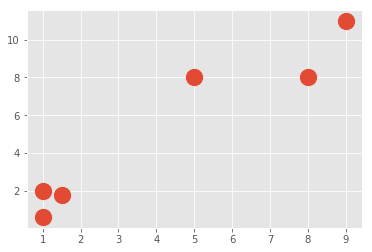

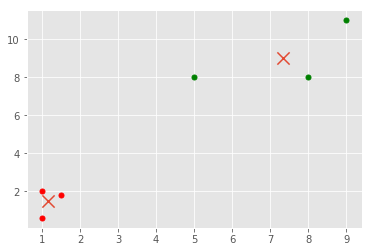

In [35]:
# Simple K-means clustering 

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

#ORIGINAL:
#Sample dataset for clustering
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5, zorder = 10)
plt.show()
#Find 2 clusters
clf = KMeans(n_clusters=2)
clf.fit(X)#X will be grouped into 2 clusters

#Find cluster centers and assign labels
centroids = clf.cluster_centers_
labels = clf.labels_

colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

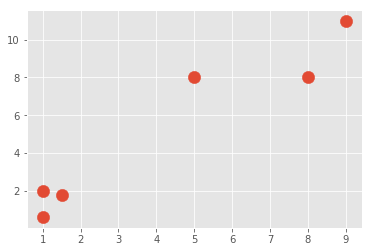

453.3333333333334
102.72108843537411


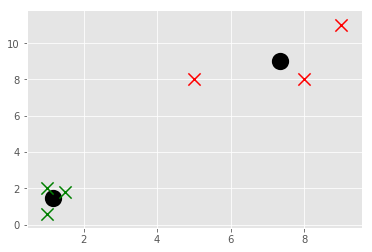

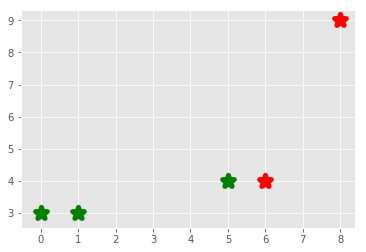

In [36]:
# kmeans from scratch 

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]

class K_Means:
    #init method is similar to a constructor
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
        #Randomly choose centroids

        for i in range(self.k):
            self.centroids[i] = data[i]
        #CLuster for a maximum of max iterations no of times

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
            #Calculate the distances
            #Assign new points to the cluster with minimal centroid distance
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True
            #As long as the cenroid movments are more than tolerance, call optimized as false
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
    #Predict for new data to find the centroids`            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()

unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, model_selection as cross_validation
import pandas as pd
import matplotlib.pyplot as plt


# https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
df = pd.read_excel('C:\\Users\\GQPF6681\\Desktop\\titanic.xls')

pd.options.mode.chained_assignment = None  # default='warn'

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):

    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:

            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them.
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string.
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

labels = clf.labels_
cluster_centers = clf.cluster_centers_

original_df['cluster_group']=np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate

print(survival_rates)
#print(original_df[ (original_df['cluster_group']==1) ])
#print(original_df[ (original_df['cluster_group']==0) ].describe())